### Pt - refrakční efekt, příloha 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import libMStruct as mst

Import experimentálních dat

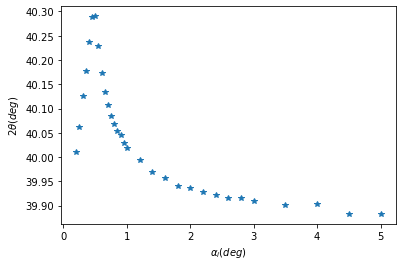

In [3]:
expdata = np.loadtxt('data/tth-exp.txt').transpose()

plt.plot(expdata[0,:],expdata[1,:],"*")
plt.xlabel(r"$\alpha_i (deg)$")
plt.ylabel(r"$2\theta (deg)$");

Import struktury

In [4]:
cryst = mst.CreateCrystalFromXML("data/structures_NiPt.xml", "Pt-fcc")

XML: Loading Crystal:
XML: Loading Crystal:Pt-fcc(spg:F m -3 m)
Input ScatteringPowerAtom:Pt(Pt)
Could not find colour:Pt for ScatteringPower Pt
XML: Loading Atom:Pt1


Konstrukce základních objektů:
    - práškový záznam
    - difrakční profil
    - refrakční korekce (!!!)

In [5]:
pattern = mst.PowderPattern()
pattern.SetWavelength("CuA1")
crystData = mst.PowderPatternDiffraction()
crystData.SetCrystal(cryst)
pattern.AddComponent(crystData)
rad = mst.Radiation("CuA1", 0.5)
profile = mst.ReflectionProfile(cryst, rad)
crystData.SetProfile(profile)
refCorr = mst.RefractionPositionCorr()
profile.AddComponent(refCorr)
refCorr.SetCrystal(cryst, True)

Přiklad - výpočet refrační korekce

Nafituj naměřená data, proměnné:
    - poloha reflexe obsahující všechny další korekce (zde externí parametr)
    - relativní hustota vrozku vztažená k hustotě krystalu (mstruct)

MStruct::RefractionPositionCorr::GetChi0(...): Chi0 and absolute density computed for Crystal: Pt-fcc
	chi0: (-1.0375e-04,-1.0197e-05) (n=1-delata-ii*beta~=1+chi0/2)
	critical angle: 0.52(deg)
	density: 21.442 (g/cm3)


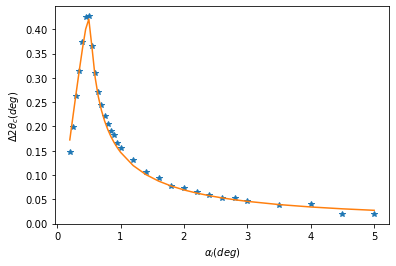

In [6]:
alpha_i = expdata[0,:] * np.pi/180.0 # (rad)
ymeas = expdata[1,:] * np.pi/180.0 # (rad)
ycalc = np.zeros(alpha_i.shape,alpha_i.dtype)

rad2deg = 180.0/np.pi

rel_density = 0.8 # - parameter
tth_zero = 0.02 # (deg) - parameter

refCorr.SetParams(rel_density)

tthB = ymeas[-1] - tth_zero * np.pi/180.

for idx,ai in enumerate(alpha_i):
    profile.SetIncidenceAngle(ai)
    ycalc[idx] = refCorr.GetPositionCorr(40.0*np.pi/180.0, 0.0, 0.0, 0.0) # approx peak position
    
plt.plot(alpha_i*rad2deg, (ymeas-tthB)*rad2deg,"*",alpha_i*rad2deg, ycalc*rad2deg,"-")
plt.xlabel(r"$\alpha_i (deg)$")
plt.ylabel(r"$\Delta2\theta_c (deg)$");